In [1]:
import os
import pickle
import random
import logging
import argparse

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer
from datetime import timedelta

from models import WordEncoder, Attention, TagEmbedding, WordDecoder, MSVED, KumaMSD
from dataset import MorphologyDatasetTask3, Vocabulary

from kumaraswamy import Kumaraswamy
from hard_kumaraswamy import StretchedAndRectifiedDistribution as HardKumaraswamy

from main import *

In [2]:
vocab = Vocabulary('turkish')

In [3]:
def plot_function(sample, actual, vocab):
    x_labels = list(vocab.idx_2_desc.values())

    fig, ax = plt.subplots()
    im = ax.imshow(torch.cat((sample, actual), 0))

    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(['sample', 'actual'])

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")
    plt.show()


-------------
    TEST
-------------
Source: ['erkeneklerim']
Target: ['erkeneklermiş']
MSD   : ['pos=N,tense=PST,per=3,num=PL,evid=NFH']


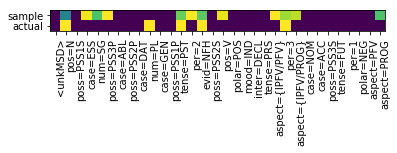

In [14]:
sample, actual, info = test('turkish', '14', vocab, True)

print('Source: {}'.format(info['source_str']))
print('Target: {}'.format(info['target_str']))
print('MSD   : {}'.format(info['msd_str']))

plot_function(sample, actual, vocab)